# Piyush Verma
## Reg No. : 230968114   
## Deep Learning Lab 5

## Simple RNN Demo - Question 1

## Import Required Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from keras.callbacks import History
from keras.layers import Dense, Input, SimpleRNN
from keras.models import Sequential

2025-08-21 11:15:32.347243: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-21 11:15:32.374762: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755755132.403385  202615 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755755132.412682  202615 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1755755132.434417  202615 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

## Function to Generate time series

In [2]:
def generate_time_series(sample_size, n_steps):
 freq1, freq2, offsets1, offsets2 = np.random.rand(4, sample_size, 1)
 time = np.linspace(0, 1, n_steps)
 series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10)) 
 series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) 
 series += 0.1 * (np.random.rand(sample_size, n_steps) - 0.5) 
 return series[..., np.newaxis].astype(np.float32)

## Defining 50 steps and generating time series

In [3]:
nsteps = 50
data : np.ndarray = generate_time_series(10000, nsteps + 1)
data

array([[[ 0.1844606 ],
        [ 0.2434289 ],
        [ 0.29285336],
        ...,
        [-0.25187415],
        [-0.2541004 ],
        [-0.13878621]],

       [[-0.43597627],
        [-0.32196447],
        [-0.15232891],
        ...,
        [ 0.06854506],
        [-0.11986134],
        [-0.39586955]],

       [[-0.23661853],
        [-0.47313383],
        [-0.60251915],
        ...,
        [ 0.58844954],
        [ 0.5246555 ],
        [ 0.31895903]],

       ...,

       [[ 0.59092855],
        [ 0.38348526],
        [ 0.20598716],
        ...,
        [-0.47849274],
        [-0.655958  ],
        [-0.69522434]],

       [[-0.26390702],
        [-0.42107755],
        [-0.45823592],
        ...,
        [ 0.53274184],
        [ 0.3861353 ],
        [ 0.1594383 ]],

       [[-0.15612198],
        [ 0.06721861],
        [ 0.33518538],
        ...,
        [-0.2293861 ],
        [-0.3855673 ],
        [-0.5431306 ]]], dtype=float32)

In [4]:
data.shape

(10000, 51, 1)

## Splitting Data into train, validation and test in the speicifed 70:20:10 ratio

In [5]:
X_train : np.ndarray = data[:7000, :nsteps]
X_valid : np.ndarray = data[7000:9000, :nsteps]
X_test : np.ndarray = data[9000:, :nsteps]

In [6]:
y_train : np.ndarray = data[:7000, -1]
y_valid : np.ndarray = data[7000:9000, -1]
y_test : np.ndarray = data[9000:, -1]

In [7]:
print(X_train.size)
print(X_test.size)
print(y_train.size)
print(y_test.size)

350000
50000
7000
1000


## Function to build RNN Model

In [8]:
def build_rnn_model(n_hidden_layers=1, n_neurons=20, input_shape=(nsteps, 1)):
    model = Sequential()
    if n_hidden_layers == 1:
        model.add(SimpleRNN(n_neurons, activation='tanh', input_shape=input_shape))
    elif n_hidden_layers == 2:
        model.add(SimpleRNN(n_neurons, activation='tanh', return_sequences=True, input_shape=input_shape))
        model.add(SimpleRNN(n_neurons, activation='tanh'))
    else:
        raise ValueError("Only 1 or 2 hidden layers supported")
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam', metrics=['mse'])
    return model

## Building Model 1 as per requirements (Simple RNN with one hidden layer and one output layer), and performing training

In [9]:
model_1 = build_rnn_model(n_hidden_layers=1)
history_1 = model_1.fit(X_train, y_train, epochs=20, batch_size=64, 
                        validation_data=(X_valid, y_valid))

I0000 00:00:1755755136.225335  202615 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10069 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6
/home/student/miniconda3/envs/tf-gpu/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20


I0000 00:00:1755755139.118016  202745 service.cc:152] XLA service 0x7f8f480b7020 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1755755139.118051  202745 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-08-21 11:15:39.167522: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1755755139.353656  202745 cuda_dnn.cc:529] Loaded cuDNN version 91100


  7/110 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6011 - mse: 0.6011 

I0000 00:00:1755755140.036934  202745 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2442 - mse: 0.2442 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 2/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 3/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 4/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0102 - mse: 0.0102 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 5/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 6/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 7/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 8/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 9/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss

## Evaluating Model 1 using test Data

In [10]:
mse_1 = model_1.evaluate(X_test, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0030 - mse: 0.0030


In [11]:
print(f"Test MSE of 1-layer RNN: {mse_1[0]:.5f}")

Test MSE of 1-layer RNN: 0.00282


## Building Model 2 as per requirements (Simple RNN with two hidden layers and one output layer), and performing training

In [12]:
model_2 = build_rnn_model(n_hidden_layers=2)
history_2 = model_2.fit(X_train, y_train, epochs=20, batch_size=64, 
                        validation_data=(X_valid, y_valid))

Epoch 1/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.1472 - mse: 0.1472 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 2/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 3/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 4/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 5/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 6/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 7/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 8/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 9/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/

## Evaluating Model 2 using Test Data

In [13]:
mse_2 = model_2.evaluate(X_test, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0034 - mse: 0.0034


In [14]:
print(f"Test MSE of 2-layer RNN: {mse_2[0]:.5f}")

Test MSE of 2-layer RNN: 0.00319


## Plotting Training and Validation Loss for Both Models

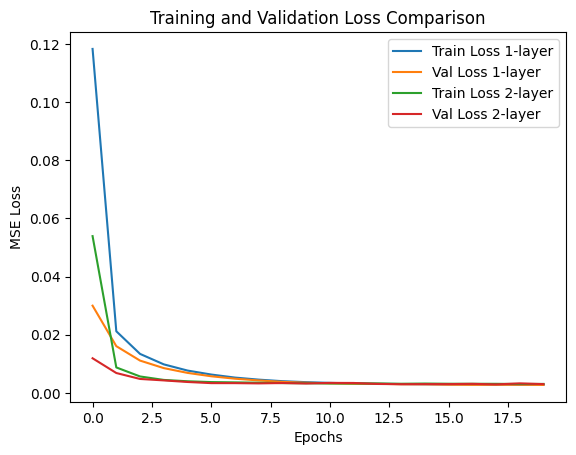

In [15]:
plt.plot(history_1.history['loss'], label='Train Loss 1-layer')
plt.plot(history_1.history['val_loss'], label='Val Loss 1-layer')
plt.plot(history_2.history['loss'], label='Train Loss 2-layer')
plt.plot(history_2.history['val_loss'], label='Val Loss 2-layer')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Training and Validation Loss Comparison')
plt.show()

In [21]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 20)             │           440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,385 (5.41 KB)

 Trainable params: 461 (1.80 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 924 (3.61 KB)

In [22]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 50, 20)         │           440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 20)             │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,845 (15.02 KB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,564 (10.02 KB)

## Inference : Both Models show good performance and have almost identical loss on convergence. Model 2 converges faster, perhaps due to the presence of the extra layer 

# Question 2 : Baltimore Crime Dataset

## Required Imports

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, Dense

## Loading the Dataset

In [17]:
df = pd.read_csv('BPD_Part_1_Victim_Based_Crime_Data.csv')

## Data Preprocessing 

In [40]:
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'])
df['CrimeCode'] = df['CrimeCode'].astype(str)

df['CrimeType'] = np.where(df['CrimeCode'].str.startswith('6'), 'LARCENY',
                  np.where(df['CrimeCode'].str.startswith('5'), 'BURGLARY', 'OTHER'))

df_filtered = df[df['CrimeType'].isin(['LARCENY', 'BURGLARY'])]

daily_counts = df_filtered.groupby(['CrimeDate', 'CrimeType']).size().unstack(fill_value=0)

# Fill missing dates in the full range
all_dates = pd.date_range(start=daily_counts.index.min(), end=daily_counts.index.max())
daily_counts = daily_counts.reindex(all_dates, fill_value=0)
daily_counts.index.name = 'Date'

#Split dataset into test and train (years 2014 and 2015 are to be used for train data) 
#On the basis of which the model will predict crimes in 2016 and compare it with the actual values)
train = daily_counts.loc['2014-01-01':'2015-12-31']
test = daily_counts.loc['2016-01-01':'2016-12-31']

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Creating time series datasets

In [20]:
def create_sequences(data, seq_length=30):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 30
X_train, y_train = create_sequences(train_scaled, seq_length)
X_test, y_test = create_sequences(test_scaled, seq_length)

## Creating Simple RNN

In [23]:
def build_simple_rnn(input_shape):
    model = Sequential([
        SimpleRNN(50, return_sequences=True, input_shape=input_shape),
        SimpleRNN(50, return_sequences=True),
        SimpleRNN(50, return_sequences=True),
        SimpleRNN(50),
        Dense(2)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

In [24]:
input_shape = (seq_length, 2)  # 2 features: LARCENY and BURGLARY
model_rnn = build_simple_rnn(input_shape)

/home/student/miniconda3/envs/tf-gpu/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Defining parameters for the models

In [25]:
epochs = 30
batch_size = 32

## Training the RNN

In [26]:
history_rnn = model_rnn.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                            validation_split=0.2, verbose=2)

Epoch 1/30
18/18 - 11s - 634ms/step - loss: 0.0490 - val_loss: 0.0112
Epoch 2/30
18/18 - 0s - 27ms/step - loss: 0.0147 - val_loss: 0.0108
Epoch 3/30
18/18 - 0s - 26ms/step - loss: 0.0137 - val_loss: 0.0198
Epoch 4/30
18/18 - 0s - 26ms/step - loss: 0.0153 - val_loss: 0.0117
Epoch 5/30
18/18 - 0s - 26ms/step - loss: 0.0126 - val_loss: 0.0102
Epoch 6/30
18/18 - 0s - 26ms/step - loss: 0.0123 - val_loss: 0.0102
Epoch 7/30
18/18 - 0s - 26ms/step - loss: 0.0119 - val_loss: 0.0096
Epoch 8/30
18/18 - 0s - 26ms/step - loss: 0.0117 - val_loss: 0.0103
Epoch 9/30
18/18 - 0s - 26ms/step - loss: 0.0117 - val_loss: 0.0101
Epoch 10/30
18/18 - 0s - 26ms/step - loss: 0.0126 - val_loss: 0.0101
Epoch 11/30
18/18 - 0s - 25ms/step - loss: 0.0117 - val_loss: 0.0095
Epoch 12/30
18/18 - 0s - 26ms/step - loss: 0.0118 - val_loss: 0.0098
Epoch 13/30
18/18 - 1s - 28ms/step - loss: 0.0116 - val_loss: 0.0094
Epoch 14/30
18/18 - 0s - 28ms/step - loss: 0.0120 - val_loss: 0.0089
Epoch 15/30
18/18 - 0s - 26ms/step - loss

In [27]:
y_pred_rnn = model_rnn.predict(X_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step


In [28]:
y_test_orig = scaler.inverse_transform(y_test)
y_pred_rnn_orig = scaler.inverse_transform(y_pred_rnn)

## Building the LSTM

In [29]:
def build_lstm(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        LSTM(50, return_sequences=True),
        LSTM(50, return_sequences=True),
        LSTM(50),
        Dense(2)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

In [30]:
model_lstm = build_lstm(input_shape)

/home/student/miniconda3/envs/tf-gpu/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Training the LSTM

In [31]:
history_lstm = model_lstm.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                              validation_split=0.2, verbose=2)

Epoch 1/30
18/18 - 6s - 317ms/step - loss: 0.0467 - val_loss: 0.0122
Epoch 2/30
18/18 - 0s - 25ms/step - loss: 0.0132 - val_loss: 0.0099
Epoch 3/30
18/18 - 0s - 23ms/step - loss: 0.0128 - val_loss: 0.0090
Epoch 4/30
18/18 - 0s - 22ms/step - loss: 0.0125 - val_loss: 0.0091
Epoch 5/30
18/18 - 0s - 23ms/step - loss: 0.0122 - val_loss: 0.0091
Epoch 6/30
18/18 - 0s - 22ms/step - loss: 0.0125 - val_loss: 0.0100
Epoch 7/30
18/18 - 0s - 22ms/step - loss: 0.0123 - val_loss: 0.0093
Epoch 8/30
18/18 - 0s - 22ms/step - loss: 0.0123 - val_loss: 0.0093
Epoch 9/30
18/18 - 0s - 22ms/step - loss: 0.0121 - val_loss: 0.0090
Epoch 10/30
18/18 - 0s - 22ms/step - loss: 0.0126 - val_loss: 0.0090
Epoch 11/30
18/18 - 0s - 24ms/step - loss: 0.0119 - val_loss: 0.0093
Epoch 12/30
18/18 - 0s - 25ms/step - loss: 0.0120 - val_loss: 0.0092
Epoch 13/30
18/18 - 0s - 23ms/step - loss: 0.0120 - val_loss: 0.0089
Epoch 14/30
18/18 - 0s - 25ms/step - loss: 0.0120 - val_loss: 0.0093
Epoch 15/30
18/18 - 0s - 23ms/step - loss:

In [32]:
y_pred_lstm = model_lstm.predict(X_test)

y_pred_lstm_orig = scaler.inverse_transform(y_pred_lstm)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


## Defining the required evaluation metrics (MAPE and RMSE) and evaluating both the models

In [34]:
def evaluate_metrics(y_true, y_pred, crime_name):
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{crime_name}: MAPE = {mape:.2f}%, RMSE = {rmse:.2f}")

print("Simple RNN Performance:")
evaluate_metrics(y_test_orig[:, 0], y_pred_rnn_orig[:, 0], 'LARCENY')
evaluate_metrics(y_test_orig[:, 1], y_pred_rnn_orig[:, 1], 'BURGLARY')

print("\nLSTM Performance:")
evaluate_metrics(y_test_orig[:, 0], y_pred_lstm_orig[:, 0], 'LARCENY')
evaluate_metrics(y_test_orig[:, 1], y_pred_lstm_orig[:, 1], 'BURGLARY')

Simple RNN Performance:
LARCENY: MAPE = 35.38%, RMSE = 11.77
BURGLARY: MAPE = 17.29%, RMSE = 8.52

LSTM Performance:
LARCENY: MAPE = 25.53%, RMSE = 9.02
BURGLARY: MAPE = 16.47%, RMSE = 8.38


## Plot of actual vs predicted crimes

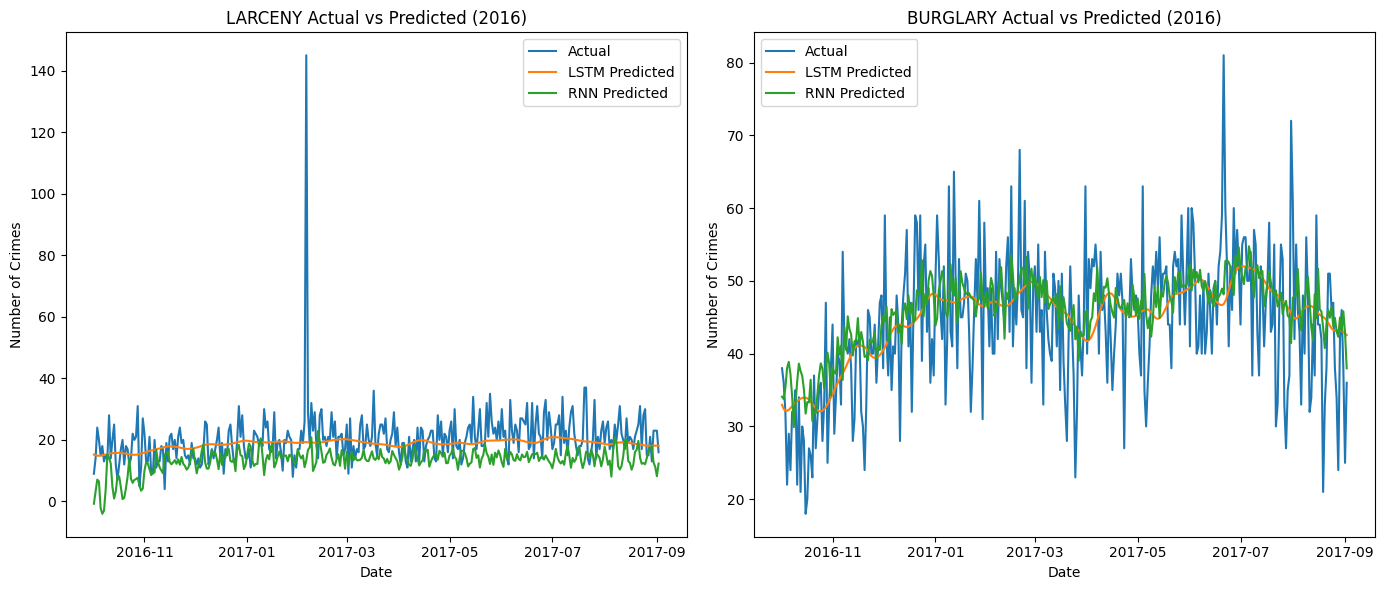

In [38]:
dates_all_test = daily_counts.loc['2016-01-01':].index
dates_test = dates_all_test[-len(y_test_orig):]  # Match the number of sequences/predictions

plt.figure(figsize=(14, 6))
for i, crime in enumerate(['LARCENY', 'BURGLARY']):
    plt.subplot(1, 2, i + 1)
    plt.plot(dates_test, y_test_orig[:, i], label='Actual')
    plt.plot(dates_test, y_pred_lstm_orig[:, i], label='LSTM Predicted')
    plt.plot(dates_test, y_pred_rnn_orig[:, i], label='RNN Predicted')
    plt.title(f'{crime} Actual vs Predicted (2016)')
    plt.xlabel('Date')
    plt.ylabel('Number of Crimes')
    plt.legend()
plt.tight_layout()
plt.show()

## Model Performance Comparison and Inferences

### 1. Comparison of Models

- The **LSTM model outperforms the Simple RNN model** on predicting both LARCENY and BURGLARY crimes, as indicated by consistently lower MAPE and RMSE values.
- For **LARCENY crimes**, the LSTM achieves a MAPE of **25.53%**, which is significantly better than the Simple RNN's MAPE of **35.38%**. The RMSE also improves from **11.77** (Simple RNN) to **9.02** (LSTM).
- For **BURGLARY crimes**, although the difference is smaller, the LSTM still performs better with a MAPE of **16.47%** compared to **17.29%** from the Simple RNN, and a slightly lower RMSE of **8.38** versus **8.52**.

### 2. Interpretation

- The results suggest that **LSTM networks are better suited for modeling and forecasting time-dependent crime data** due to their ability to capture longer-term temporal dependencies through gated memory cells.
- The improved accuracy of LSTM indicates its superior capability to learn complex temporal patterns present in the crime series compared to the Simple RNN.

### 3. Error Analysis

- The **MAPE values for LARCENY (25.53% for LSTM and 35.38% for RNN)** imply moderate predictive accuracy, reflecting inherent variability or noise in the larceny crime data.
- The **BURGLARY crime predictions have lower MAPE (around 16-17%)**, suggesting that burglary crime counts are relatively easier to predict and possibly less noisy or more stable.
- Correspondingly, the RMSE values align with this trend, showing higher errors for LARCENY predictions than for BURGLARY.

### 4. Practical Implications

- For forecasting crime counts in Baltimore, **LSTM should be preferred over Simple RNN** due to its consistently better performance.
- The higher difficulty in predicting LARCENY compared to BURGLARY may require additional data or features to improve forecasting accuracy for larceny.


## Checking summary of models

In [41]:
model_rnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)        │ (None, 30, 50)         │         2,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ (None, 30, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ (None, 30, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_6 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,708 (209.80 KB)

 Trainable params: 17,902 (69.93 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 35,806 (139.87 KB)

In [42]:
model_lstm.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 50)         │        10,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 30, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 213,908 (835.58 KB)

 Trainable params: 71,302 (278.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 142,606 (557.06 KB)

## Inference : LSTM has almost 5x the training parameters of RNN meaning that RNN is much 